# Problem Statement

In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes:
>50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.
Following is the code to load required libraries and data:
import numpy as np
import pandas as pd
train_set =
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.dat
a', header = None)

test_set =
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
, skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels


## Step 0: Load libraries and dataset

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing dataset
dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

## Step 1: Descriptive analysis

In [6]:
# Preview dataset
dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32560 Columns: 15


In [8]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
39                32560 non-null int64
 State-gov        32560 non-null object
 77516            32560 non-null int64
 Bachelors        32560 non-null object
 13               32560 non-null int64
 Never-married    32560 non-null object
 Adm-clerical     32560 non-null object
 Not-in-family    32560 non-null object
 White            32560 non-null object
 Male             32560 non-null object
 2174             32560 non-null int64
 0                32560 non-null int64
 40               32560 non-null int64
 United-States    32560 non-null object
 <=50K            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
39,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
77516,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
13,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
2174,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
0,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
40,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [10]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

39                0.0 %
 State-gov        0.0 %
 77516            0.0 %
 Bachelors        0.0 %
 13               0.0 %
 Never-married    0.0 %
 Adm-clerical     0.0 %
 Not-in-family    0.0 %
 White            0.0 %
 Male             0.0 %
 2174             0.0 %
 0                0.0 %
 40               0.0 %
 United-States    0.0 %
 <=50K            0.0 %
dtype: object

In [11]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

39                0.0 %
 State-gov        0.0 %
 77516            0.0 %
 Bachelors        0.0 %
 13               0.0 %
 Never-married    0.0 %
 Adm-clerical     0.0 %
 Not-in-family    0.0 %
 White            0.0 %
 Male             0.0 %
 2174             0.0 %
 0                0.0 %
 40               0.0 %
 United-States    0.0 %
 <=50K            0.0 %
dtype: object

In [12]:
# Check for '?' in dataset
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

39                0.0 %
 State-gov        0.0 %
 77516            0.0 %
 Bachelors        0.0 %
 13               0.0 %
 Never-married    0.0 %
 Adm-clerical     0.0 %
 Not-in-family    0.0 %
 White            0.0 %
 Male             0.0 %
 2174             0.0 %
 0                0.0 %
 40               0.0 %
 United-States    0.0 %
 <=50K            0.0 %
dtype: object

In [13]:
#Rename the Columns

dataset.columns =["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]
display(dataset.head(6))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [14]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: income, dtype: object

#### Observations:
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.

The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

## Step 2: Exploratory Data Analysis
2.1: Univariate Analysis

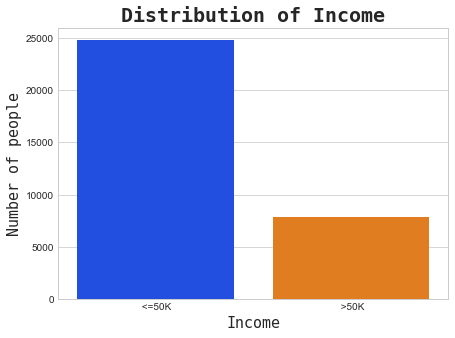

In [15]:
# Creating a barplot for 'Income'
income = dataset['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)

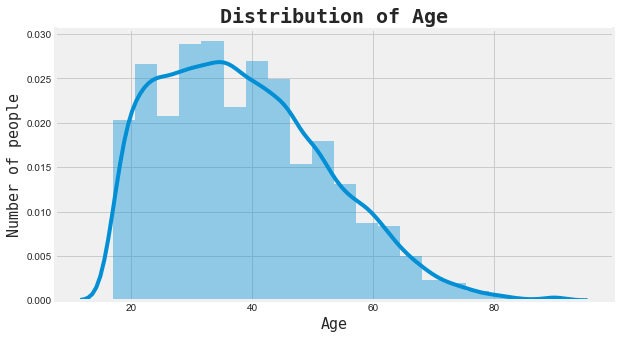

In [16]:
# Creating a distribution plot for 'Age'
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

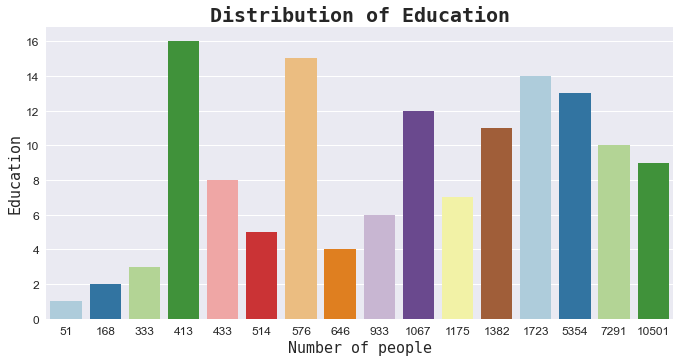

In [17]:
# Creating a barplot for 'Education'
edu = dataset['education_num'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

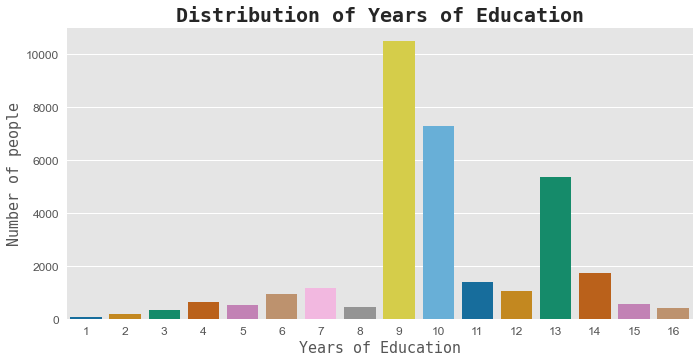

In [18]:
# Creating a barplot for 'Years of Education'
edu_num = dataset['education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

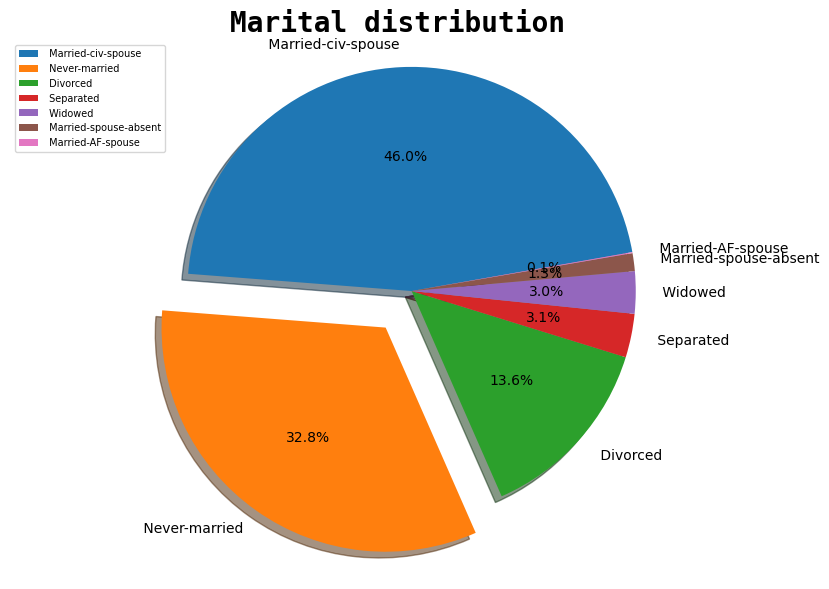

In [19]:
# Creating a pie chart for 'Marital status'
marital = dataset['marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

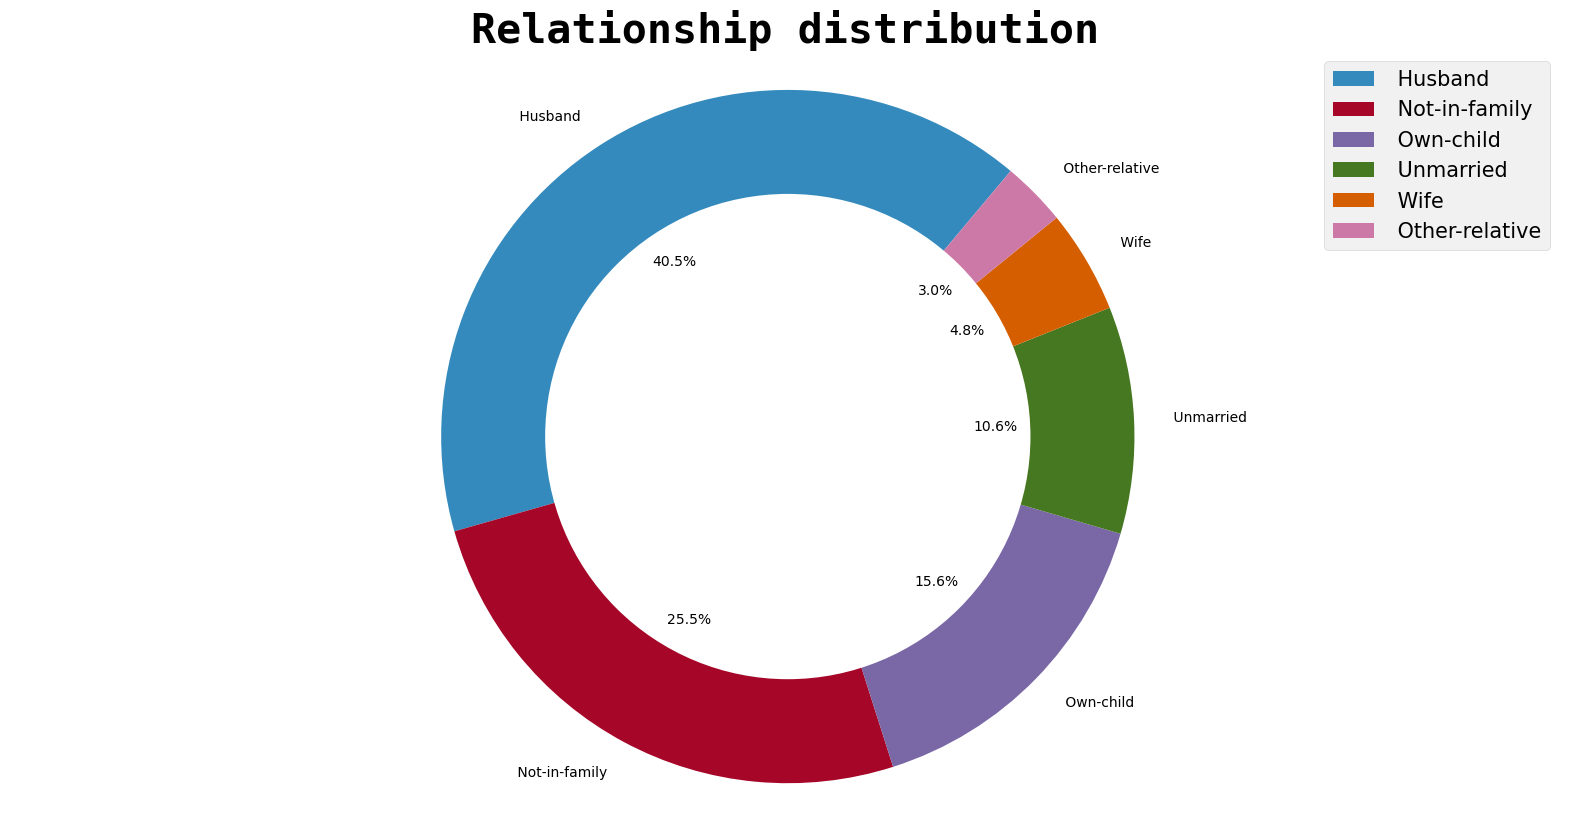

In [20]:
# Creating a donut chart for 'Age'
relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

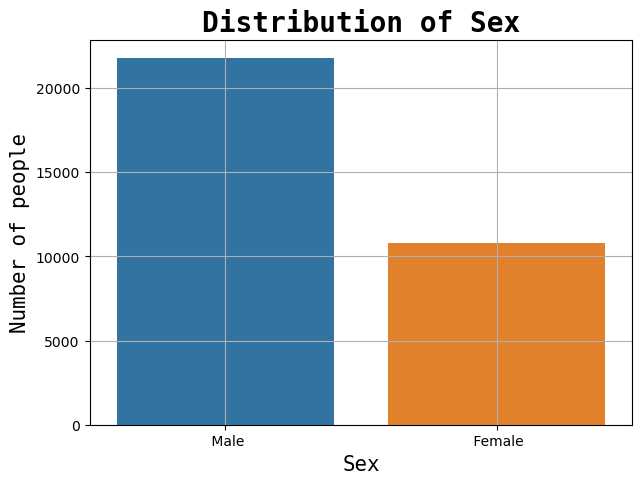

In [21]:
# Creating a barplot for 'Sex'
sex = dataset['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

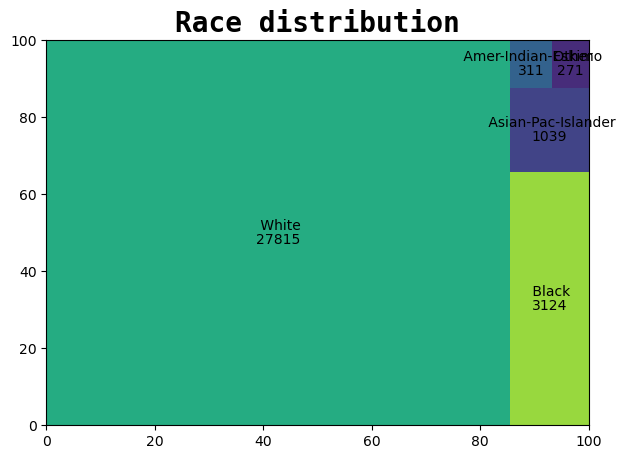

In [22]:
# Creating a Treemap for 'Race'

!pip install squarify 

import squarify
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

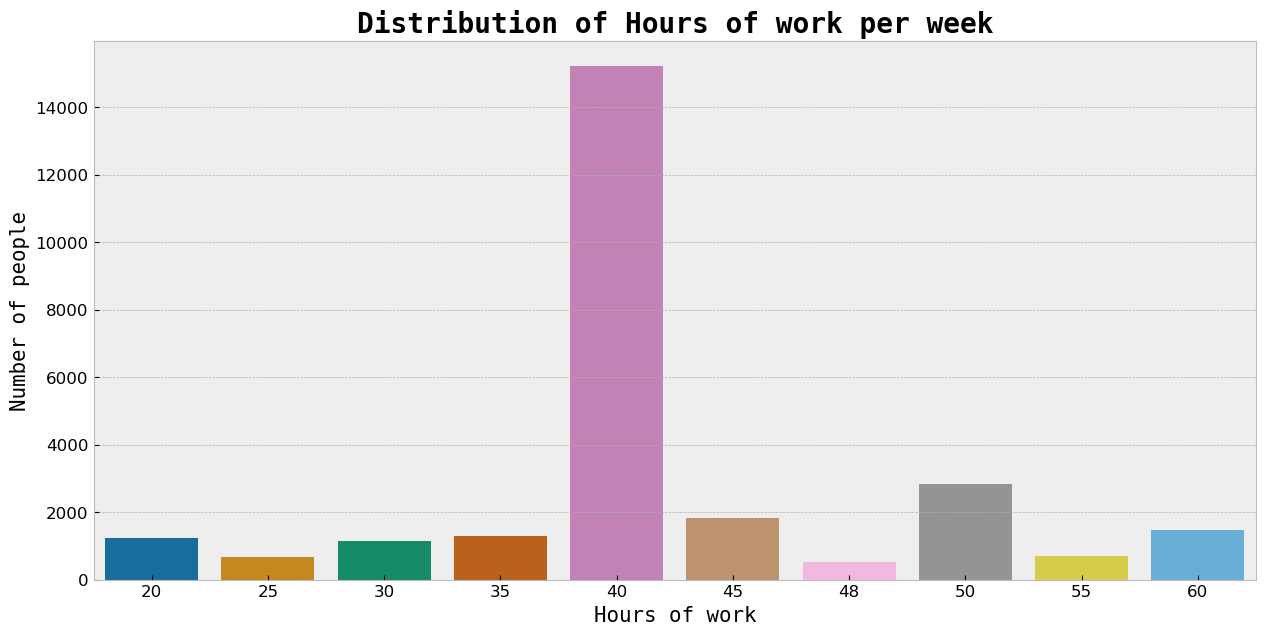

In [23]:
# Creating a barplot for 'Hours per week'
hours = dataset['hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

### 2.2 Bivariate Analysis

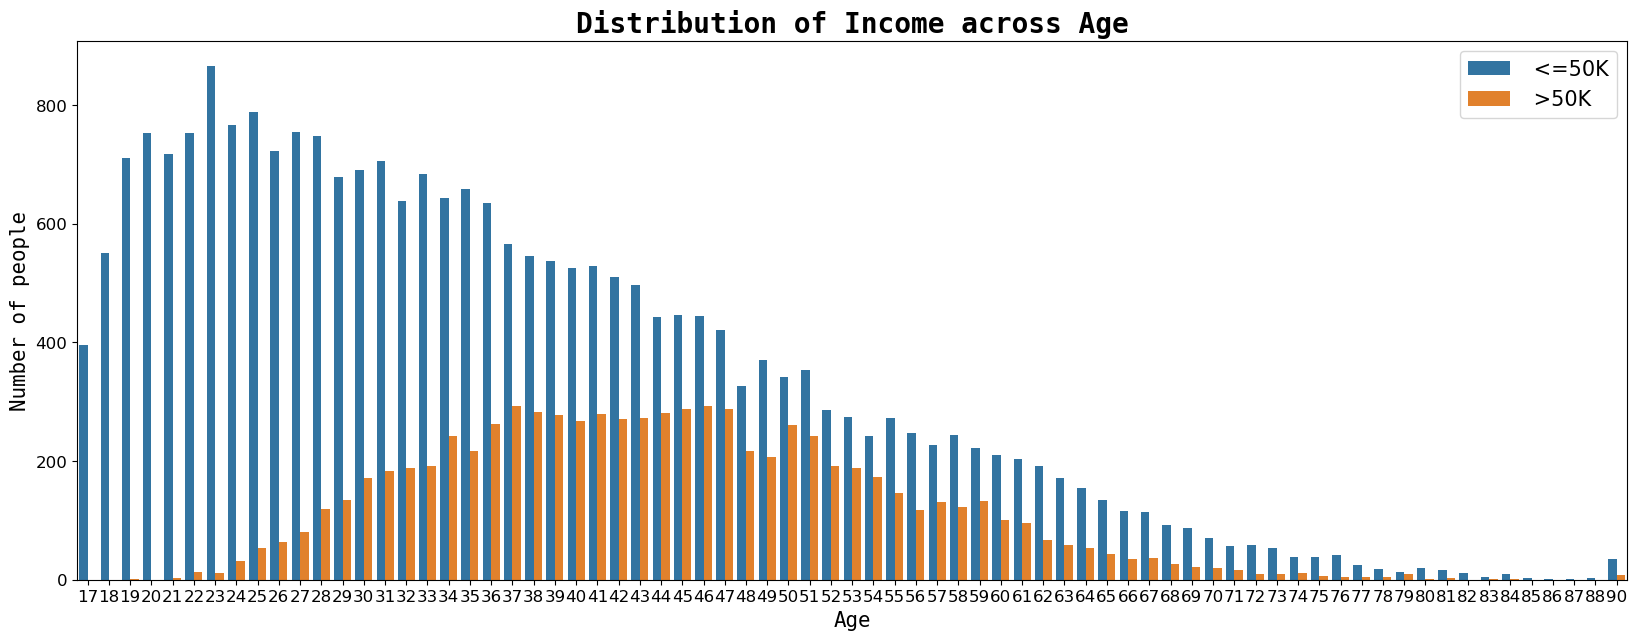

In [24]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['age'], hue=dataset['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

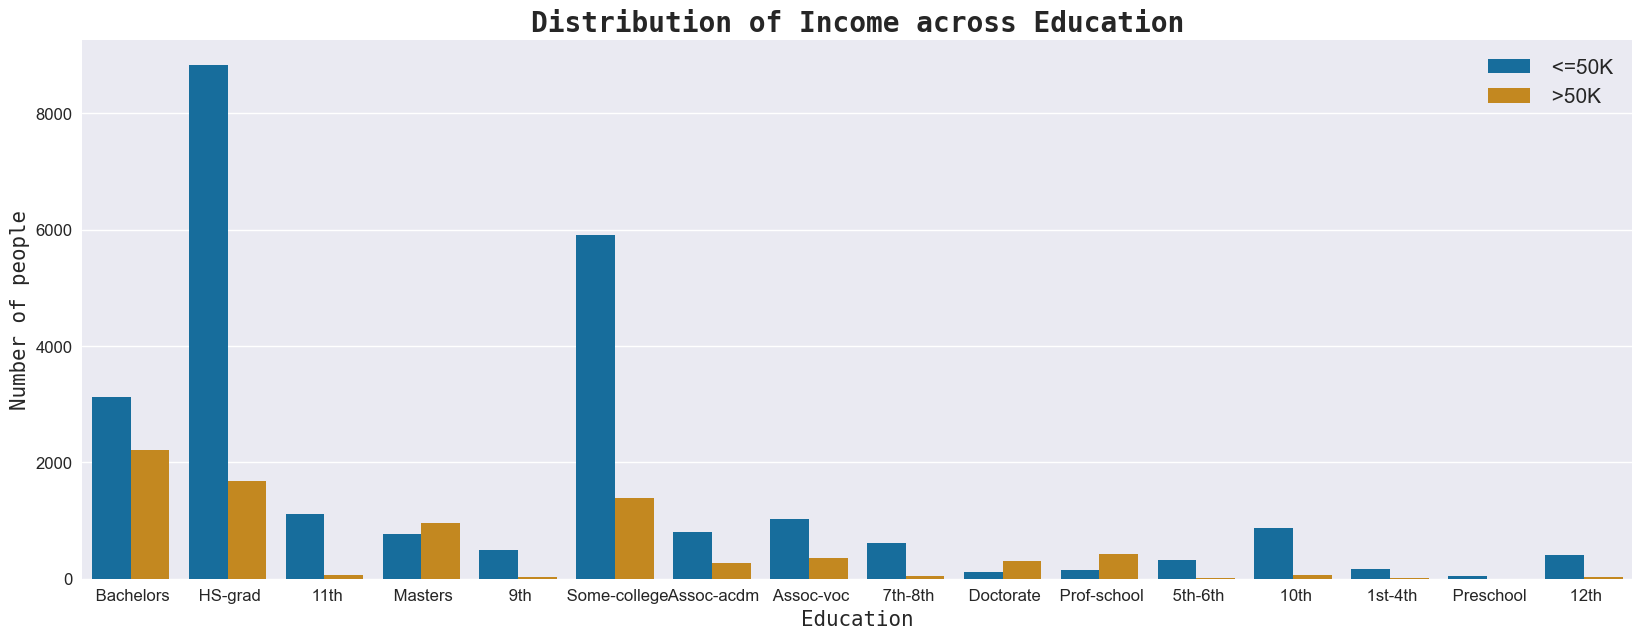

In [25]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['education'],
              hue=dataset['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

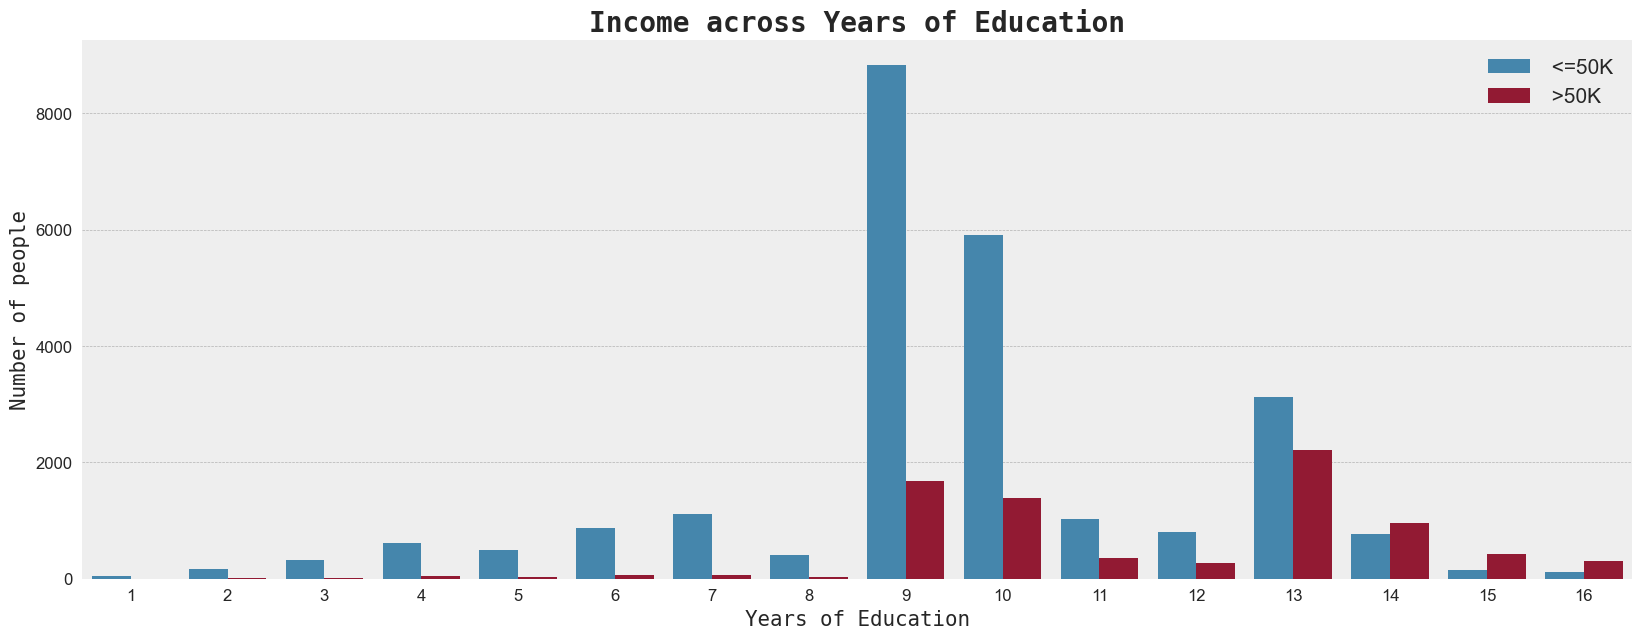

In [26]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['education_num'],
              hue=dataset['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

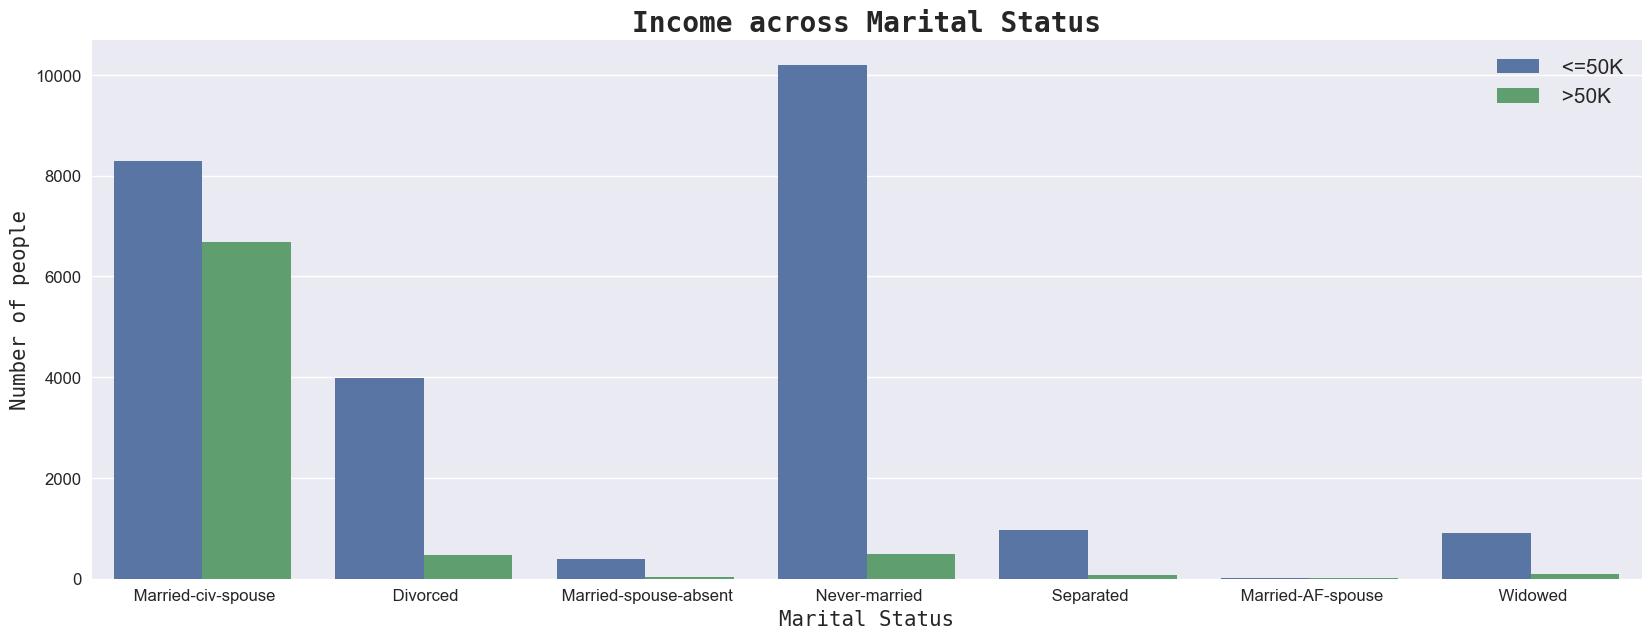

In [27]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['marital_status'], hue=dataset['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

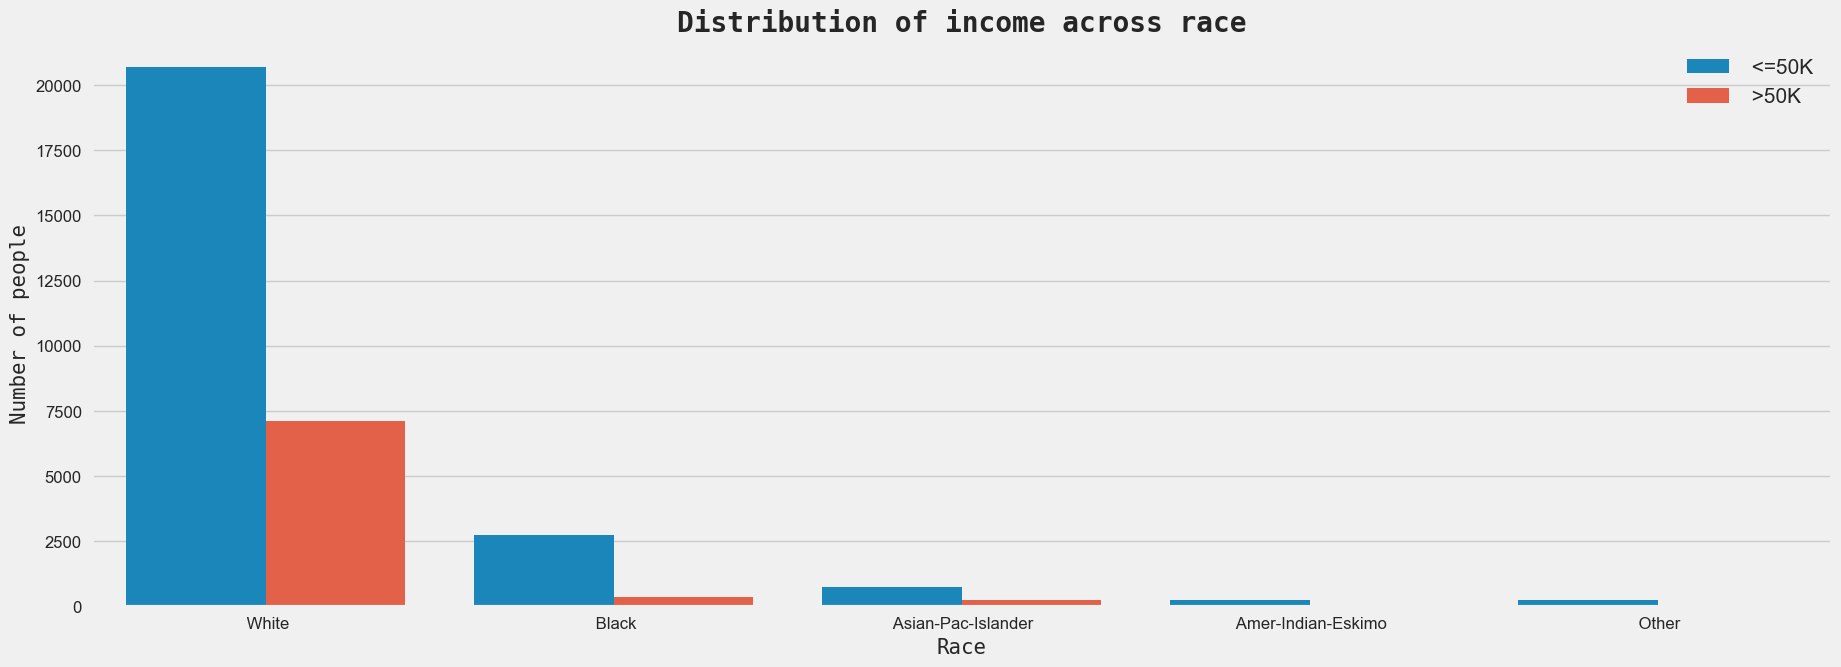

In [28]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['race'], hue=dataset['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

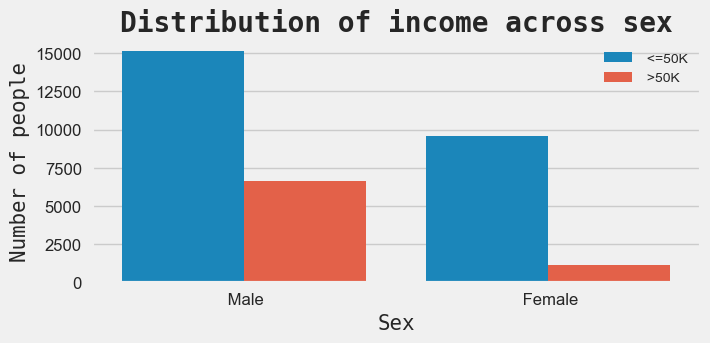

In [29]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(dataset['sex'], hue=dataset['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

### 2.3: Multivariate Analysis

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
dataset['income'] = le.fit_transform(dataset['income'])

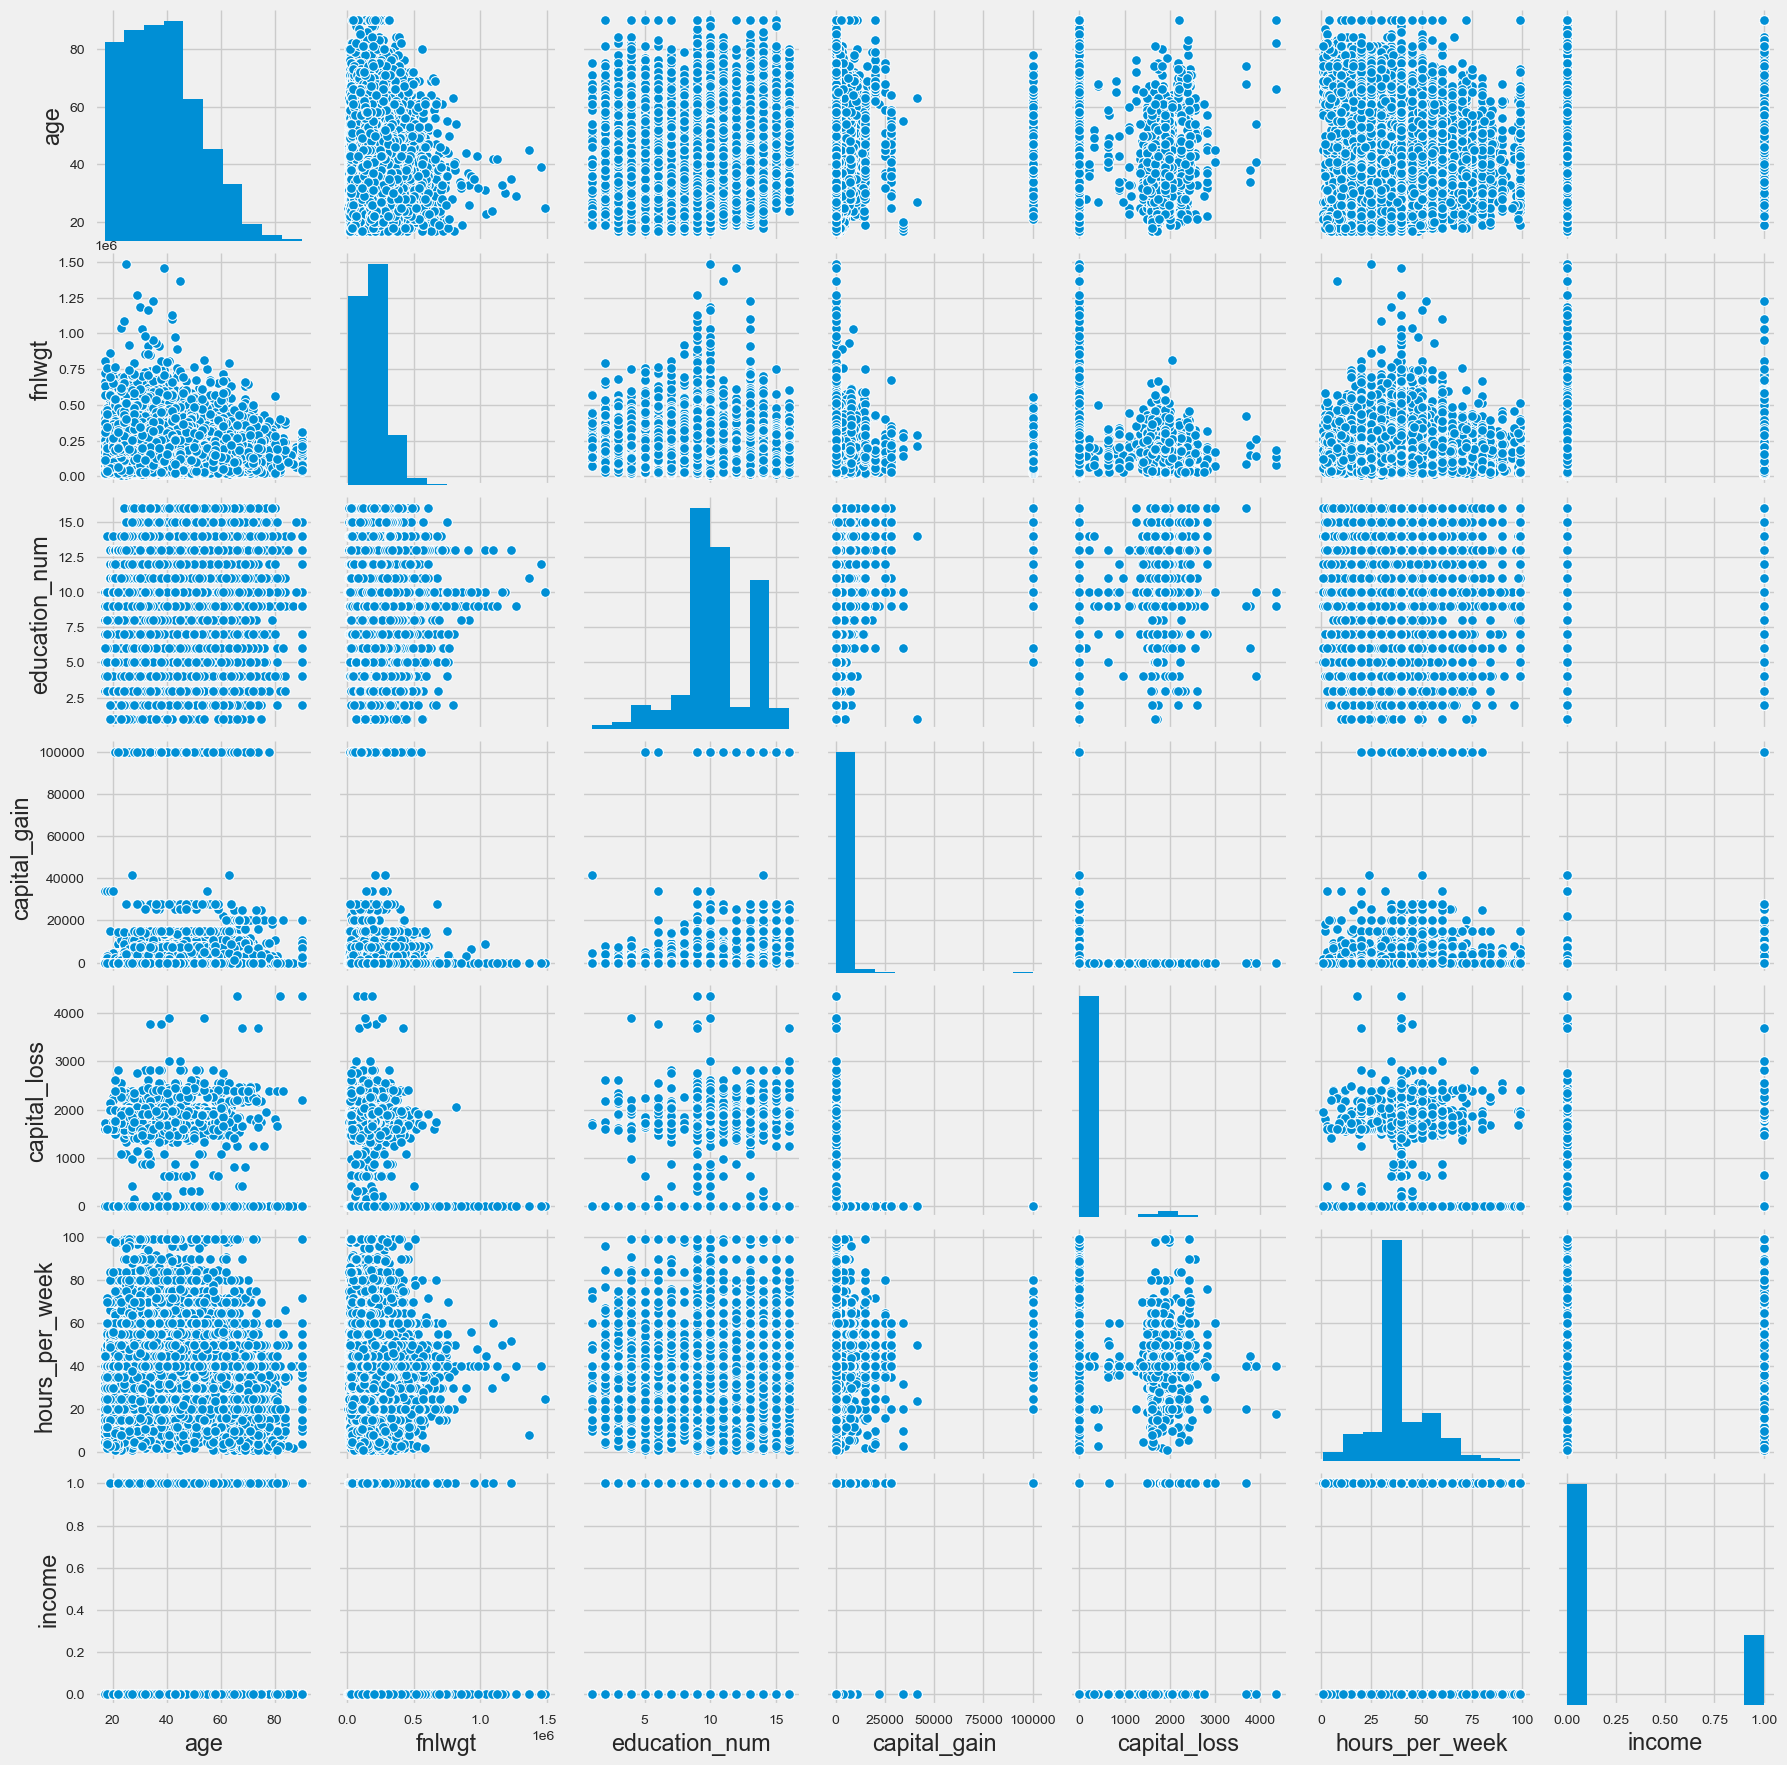

In [32]:
#Creating a pairplot of dataset
sns.pairplot(dataset)
plt.savefig('multi1.png')
plt.show()

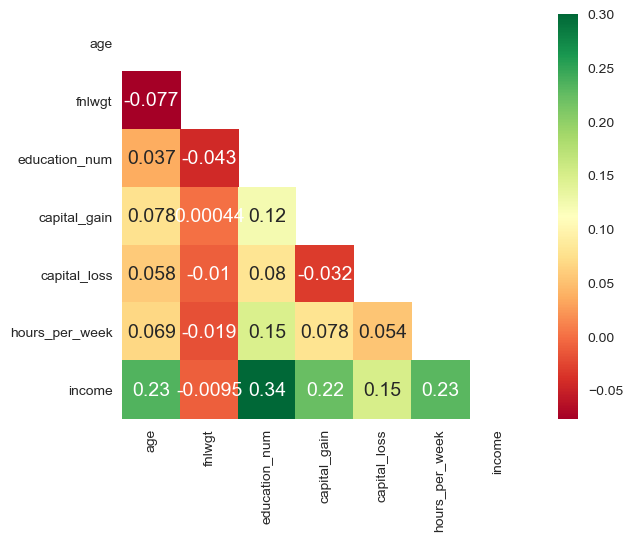

In [33]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

## Observations:

#### In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

#### From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

## Step 3: Data Preprocessing
### 3.1: Fixing '?' values in the dataset

In [34]:
dataset = dataset.replace('?', np.nan)

In [35]:
# Checking null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_num     0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
income            0.0 %
dtype: object

In [36]:
columns_with_nan = ['workclass', 'occupation', 'native_country']

In [37]:
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

### 3.2: Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

### 3.3: Feature Selection

In [40]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [42]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [43]:
feature_imp = selector.feature_importances_

In [44]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.36
1 4.45
2 16.52
3 3.56
4 8.98
5 7.33
6 7.48
7 9.46
8 1.45
9 2.7
10 8.84
11 2.77
12 9.36
13 1.74


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
age               32560 non-null int64
workclass         32560 non-null int32
fnlwgt            32560 non-null int64
education         32560 non-null int32
education_num     32560 non-null int64
marital_status    32560 non-null int32
occupation        32560 non-null int32
relationship      32560 non-null int32
race              32560 non-null int32
sex               32560 non-null int32
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    32560 non-null int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [46]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital_loss', 'native_country'], axis=1)

### 3.4: Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [49]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [50]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
ros = RandomOverSampler(random_state=42)

In [52]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [53]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [54]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: income, dtype: object

### 3.6: Creating a train test split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [56]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39550, 8)
X_test shape: (9888, 8)
Y_train shape: (39550,)
Y_test shape: (9888,)


# Step 4: Data Modelling
## 4.1: Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [58]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [60]:
Y_pred_log_reg = log_reg.predict(X_test)

## 4.2: KNN Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [62]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [63]:
Y_pred_knn = knn.predict(X_test)

## 4.3: Support Vector Classifier

In [65]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [66]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [67]:
Y_pred_svc = svc.predict(X_test)

## 4.4: Naive Bayes Classifier

In [68]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [69]:
nb.fit(X_train, Y_train)

GaussianNB()

In [70]:
Y_pred_nb = nb.predict(X_test)

## 4.5: Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [72]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
Y_pred_dec_tree = dec_tree.predict(X_test)

## 4.6: Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [76]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [77]:
RandomForestClassifier(random_state=42)

RandomForestClassifier(random_state=42)

In [78]:
Y_pred_ran_for = ran_for.predict(X_test)

## 4.7: XGB Classifier

In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [81]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
Y_pred_xgb = xgb.predict(X_test)

# Step 5: Model Evaluation

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [84]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 76.05
F1 score: 76.07


In [85]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.61
F1 score: 84.63


In [86]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.99
F1 score: 83.09


In [87]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 66.26
F1 score: 52.03


In [88]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.28
F1 score: 91.75


In [89]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.57
F1 score: 92.93


In [90]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 86.45
F1 score: 87.04


# Step 6: Hyperparameter Tuning

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [93]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [94]:
rf_tuned = RandomForestClassifier(random_state=42)

In [95]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [96]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [97]:
rf_cv.best_score_

0.9123135271807838

In [98]:
rf_cv.best_params_

{'n_estimators': 134, 'max_depth': 142}

In [99]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [103]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [104]:
Y_pred_rf_best = rf_best.predict(X_test)

In [105]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.59
F1 score: 92.95


In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

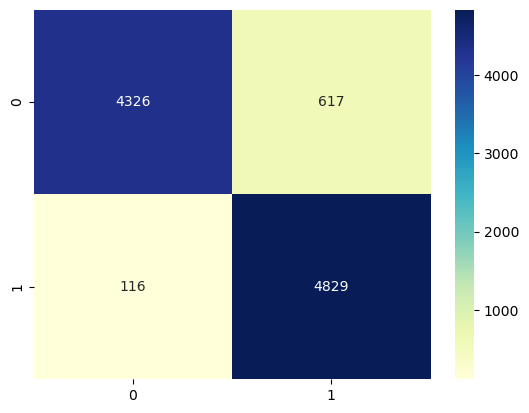

In [107]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [108]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4943
           1       0.89      0.98      0.93      4945

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888

